## Objetivos

  - Apresentar o conceito de Regressão
  - Apresentar e utilizar algoritmo de Regressão linear
  - Apresentar e utilizar Regressão Polinomial
  - Apresentar e discutir a matriz de correlação
  - Apresentar uma intuição sobre métricas de avaliação (MSE, RMSE e $ R² $ )


  

## Começando

Sabemos que dentro de aprendizado supervisionado vamos trabalhar com dois tipos de problemas:

- [x]  Classificação - (Já conhecemos o KNN)
- [ ]  Regressão - (Objetivo de hoje)

### Uma intuição sobre problemas que envolvem cada um deles:

        Classificação --> Resultados discretos (categóricos).
        Regressão --> Resultados numéricos e contínuos.


### Regressão linear

É uma técnica que consiste em representar um conjunto de dados por meio de uma reta.


    Na matemática aprendemos que a equação de uma reta é:

$$
Y = A + BX \\
$$
A e B são constantes que determinam a posição e inclinação da reta. Para cada valor de X temos um Y associado.

    Em machine learning aprendemos que uma Regressão linear é:

$$
Y_{predito} = \beta_o + \beta_1X \\
$$

$ \beta_o $ e $ \beta_1 $ são parâmetros que determinam o peso e bias da rede. Para cada entrada $ X $ temos um $ Y_{predito} $ aproximado predito.

![reta](/aulas/lab03/reta.png)
<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab03/reta.png?raw=1">

Essa ideia se estende para mais de um parâmetro independente, mas nesse caso não estamos associando a uma reta e sim a um plano ou hiperplano:

$$
Y_{predito} = \beta_o + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n\\
$$

![plano](/aulas/lab03/plano.png)
<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab03/plano.png?raw=1" width="450">

Em outras palavras, modelos de regressão linear são intuitivos, fáceis de interpretar e se ajustam aos dados razoavelmente bem em muitos problemas.


## Bora lá!!

Vamos juntos realizar um projeto, do começo ao fim, usando regressão.



## Definição do problema

Vamos trabalhar com um dataset com informações coletadas U.S Census Service (tipo IBGE americano) sobre habitação na área de Boston Mass.

ref: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

informação importante sobre o significado de cada um dos atributos

7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's


    Queremos desenvolver um modelo capaz de predizer o valor de um imovel em Boston.


### Desafio 1

Do ponto de vista de machine learning, que problema é esse:

    Aprendizado supervisionado, não-supervisionado ou aprendizado por reforço?

R: Aprendizado supervisionado

    Classificação, regressão ou clusterização?

R:
Regressão


In [3]:
# Inicializção das bibliotecas
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt


O scikit-learn possui diversos dataset em seu banco de dados, um deles é o dataset que vamos utilizar hoje.

faça o import direto usando ***sklearn.datasets***

caso queira, você pode fazer o downlod do dataset direto do site e importar em seu projeto.



In [4]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
colunas = ['CRIM',	'ZN',	'INDUS',	'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',	'B',	'LSTAT']

In [5]:
# vamos carregar no pandas apenas data com os dados e "feature_names" com os nomes dos atributos

df = pd.DataFrame(data, columns=colunas)

In [6]:
#vamos adicionar mais uma coluna ao nosso dataframe com o target (alvo que vamos fazer a predição)
df['MEDV'] = target

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Desafio 2

Use os metodos info() e describe() para exibir as informações do dataframe e responda:

Existe dados faltantes?

Qual o tamanho do dataset, quantas linhas e quantas colunas?



In [8]:
# Mostra informações sobre o dataframe em si
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Desafio 3

Aplique os métodos que achar conveniente (vimos algumas opções na última aula) para visualizar os dados de forma gráfica.


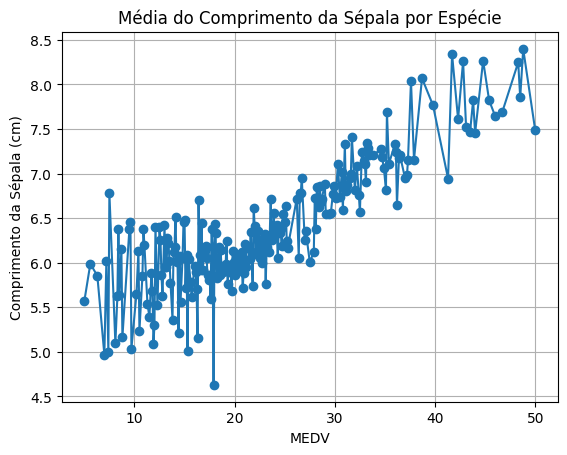

In [10]:
## Sua resposta e seus gráficos para análisar..


import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de linha para a média do comprimento da sépala de cada espécie

grouped = df.groupby('MEDV')['RM'].mean()
grouped.plot(kind='line', marker='o')


plt.title('Média do Comprimento da Sépala por Espécie')
plt.ylabel('Comprimento da Sépala (cm)')
plt.grid(True)
plt.show()





<Axes: >

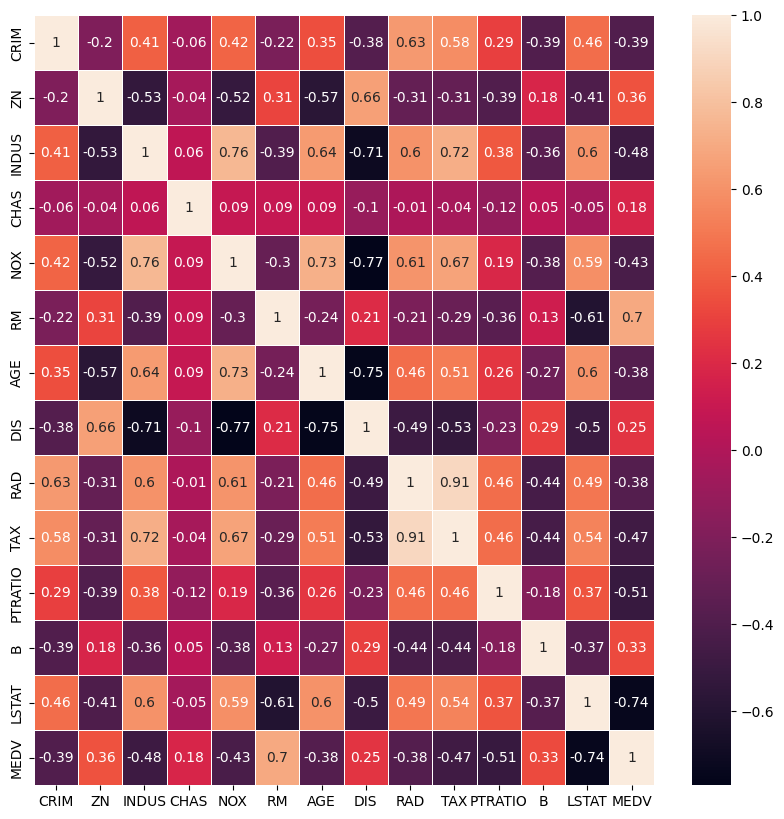

In [11]:
#Vamos explorar um pouco uma matrix de correlação

import seaborn as sns
correlation_matrix = df.corr().round(2)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

### Desafio 4

Analisando a matriz de correlação acima responda:

Qual feature possue a maior correlação ***positiva*** com o target?

Qual feature possue a maior correlação ***negativa*** com o target?


<Axes: xlabel='LSTAT', ylabel='MEDV'>

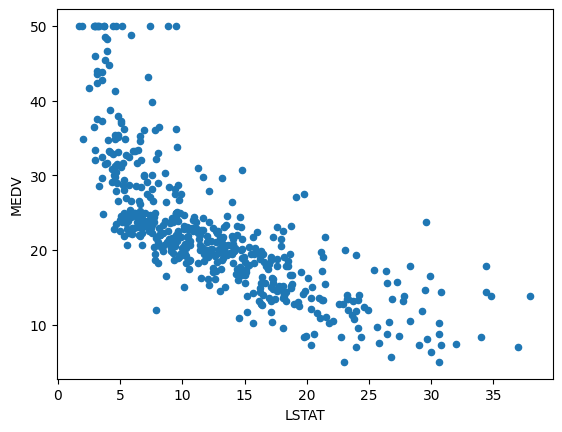

In [12]:
df.plot.scatter('LSTAT', 'MEDV') # Melhor acc -0,74 (que no dado bruto da 0,74)

<Axes: xlabel='CHAS', ylabel='MEDV'>

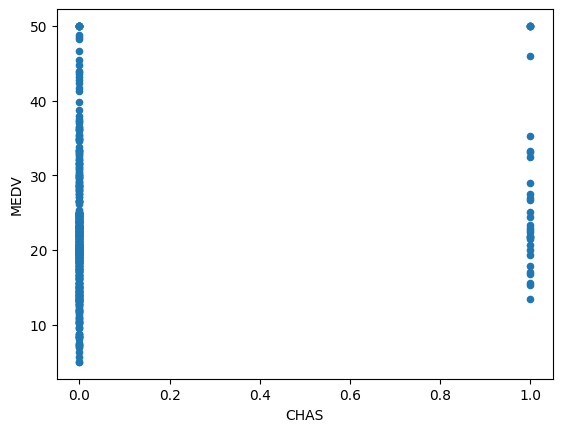

In [13]:
df.plot.scatter('CHAS', 'MEDV') # Pior acc  0,18

## PARE!!!

A análise feita no desafio 2 e 3 é uma das etapas mais importantes. Caso você tenha pulado essa etapa, volte e faça suas análises.

Com essa etapa concluída, vamos criar um sub-dataset com os atributos que serão utilizados.


In [14]:
# Vamos treinar nosso modelo com 2 dois atributos independentes
# para predizer o valor de saida
X = df[['LSTAT', 'RM']]   ### teste com duas entradas
#X = df[['RM']]            ### teste com uma entrada
#X = df.drop(['MEDV'], axis=1)     ### teste com todas as entradas

Y = df['MEDV']
print(f"Formato das tabelas de dados {X.shape} e saidas {Y.shape}")

Formato das tabelas de dados (506, 2) e saidas (506,)


## Dividindo os dados em conjunto de treinamento e de testes

Dividir nosso dataset em dois conjuntos de dados.
    
    Treinamento - Representa 80% das amostras do conjunto de dados original,
    Teste - com 20% das amostras

Vamos escolher aleatoriamente algumas amostras do conjunto original. Isto pode ser feito com Scikit-Learn usando a função ***train_test_split()***


***scikit-learn*** Caso ainda não tenha instalado, no terminal digite:
- pip install scikit-learn



In [15]:
# Separamos 20% para o teste
from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2)

print(X_treino.shape)
print(X_teste.shape)
print(Y_treino.shape)
print(Y_teste.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [16]:
#Primeiras linhas do dataframe
X_treino.head()

,LSTAT,RM
245,18.46,5.605
289,9.51,6.565
156,16.14,5.272
275,2.98,6.854
166,3.70,7.929


In [17]:
Y_treino.head()

245    18.5
289    24.8
156    13.1
275    32.0
166    50.0
Name: MEDV, dtype: float64

## Chegou a hora de aplicar o modelo preditivo

Treinar um modelo no python é simples se usar o Scikit-Learn.
Treinar um modelo no Scikit-Learn é simples: basta criar o regressor, e chamar o método fit().

Uma observação sobre a sintaxe dos classificadores do `scikit-learn`
- O método `fit(X,Y)` recebe uma matriz ou dataframe X onde cada linha é uma amostra de aprendizado, e um array Y contendo as saídas esperadas do classificador, seja na forma de texto ou de inteiros
- O método `predict(X)` recebe uma matriz ou dataframe X onde cada linha é uma amostra de teste, retornando um array de classes



In [18]:
# Importa a biblioteca
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cria o modelo de regressão
lin_model = LinearRegression()

# Cria o modelo de machine learning
lin_model.fit(X_treino, Y_treino)




LinearRegression()

Pronto!! bora testar se esta funcionando....


In [19]:
# Para obter as previsões, basta chamar o método predict()
y_teste_predito = lin_model.predict(X_teste)
print("Predição usando regressão, retorna valores continuos: {}".format(y_teste_predito))


Predição usando regressão, retorna valores continuos: [15.41769706 21.39104122 18.10189053 20.3986689  24.73345673 35.78749721
 25.27259767 20.74839474 35.31574488 22.71838244 17.60590913 12.7615267
 11.23052445 15.03086884 25.5991428  17.45325792 26.07309533 26.73750848
 30.11768144 22.4294174  16.31904669  8.68306487 19.48421096 27.8609699
 30.72678499 17.5584612  22.72710656 13.29335756 20.07734851 25.30593847
 29.96271272 20.05463454 34.38934998 20.1604657  17.85859897 30.31978151
 24.02821251 26.47628001 34.06333167 29.30738411 36.07092379 20.10344457
 10.36664246  5.83150709 26.25652957 21.78938592 37.2968915  34.69666145
 30.07667015 31.47772746 25.78672622 21.62421086 15.91645459 19.77503245
 18.44381763 20.08235204 12.71484059 17.01552053 22.46847686 23.6740891
 31.9778142  18.69463763 20.36407235 22.4308286  19.64626613 19.95208442
 22.92023413 30.20984217 19.56404428 18.04649368 29.7020411  34.58263299
 27.75712586 24.14903804 23.696107    8.70928391 25.87468865 33.89386536


In [20]:
# vamos avaliar os parametros do nosso modelo
print('(A) Intercepto: ', lin_model.intercept_)
print('(B) Inclinação: ', lin_model.coef_)
if len(lin_model.coef_)>1:
    print('Nossa equação é: Y_pred = {} + {} * X_LSTAT + {} * X_RM'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2),lin_model.coef_[1].round(2)) )
else:
        print('Nossa equação é: Y_pred = {} + {} * X_LSTAT'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2)))


(A) Intercepto:  2.5316841333978886
(B) Inclinação:  [-0.62182953  4.3975739 ]
Nossa equação é: Y_pred = 2.53 + -0.62 * X_LSTAT + 4.4 * X_RM


Text(0, 0.5, 'Valor Predito')

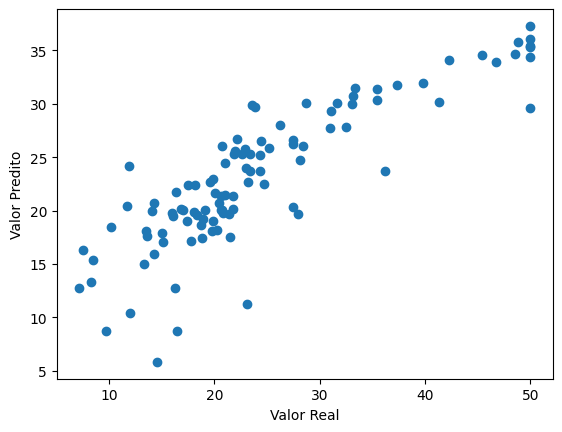

In [21]:
plt.scatter(Y_teste,y_teste_predito)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

## Avaliando o modelo treinado

Vamos colocar alguns valores e ver a predição do classificador.

In [22]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import numpy as np

print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_teste_predito - Y_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(Y_teste, y_teste_predito))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(Y_teste, y_teste_predito))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(Y_teste, y_teste_predito)))
print("R2-score: %.2f" % r2_score(y_teste_predito , Y_teste) )

Soma dos Erros ao Quadrado (SSE): 4040 
Erro Quadrático Médio (MSE): 39.61
Erro Médio Absoluto (MAE): 4.60
Raiz do Erro Quadrático Médio (RMSE): 6.29 
R2-score: 0.10


### Desafio 5

Refaça o notebook substituindo o algoritmo de regressão linear por outro algoritmo de regressão e compare os resultados obtidos.

Sugestão de alguns algoritmos de ML para problemas de regressão:

| Nome | Vantagem | Desvantagem | Exemplo sklearn |
|:---:|:---:|:---:|:---:|
| Regressão Linear | Fácil de entender e implementar | Pode não ser adequado para problemas mais complexos | from sklearn.linear_model import LinearRegression<br><br><br>model = LinearRegression()<br>model.fit(X, y)<br>prediction = model.predict([X_teste]) |
| Árvores de decisão | Fácil de entender e visualizar | Pode levar a overfitting se a árvore for muito grande | from sklearn.tree import DecisionTreeRegressor<br><br><br>model = DecisionTreeRegressor()<br>model.fit(X, y)<br>prediction = model.predict([X_teste]) |
| Random Forest | Mais robusto e geralmente mais preciso do que uma única árvore de decisão | Pode ser mais lento e mais difícil de ajustar | from sklearn.ensemble import RandomForestRegressor<br><br><br>model = RandomForestRegressor(n_estimators=100)<br>model.fit(X, y)<br>prediction = model.predict([X_teste]) |
| Support Vector Regression (SVR) | Lida bem com dados multidimensionais e não lineares | Pode ser difícil de escolher o kernel correto e ajustar os hiperparâmetros | from sklearn.svm import SVR<br><br><br>model = SVR(kernel='rbf')<br>model.fit(X, y)<br>prediction = model.predict([X_teste]) |
| Gradient Boosting | Preciso e lida bem com dados multidimensionais e não lineares | Pode ser mais lento e mais difícil de ajustar | from sklearn.ensemble import GradientBoostingRegressor<br><br><br>model = GradientBoostingRegressor(n_estimators=100)<br>model.fit(X, y)<br>prediction = model.predict([X_teste]) |
|  |  |  |  |




Mean Squared Error (Decision Tree): 0.9159978198219152


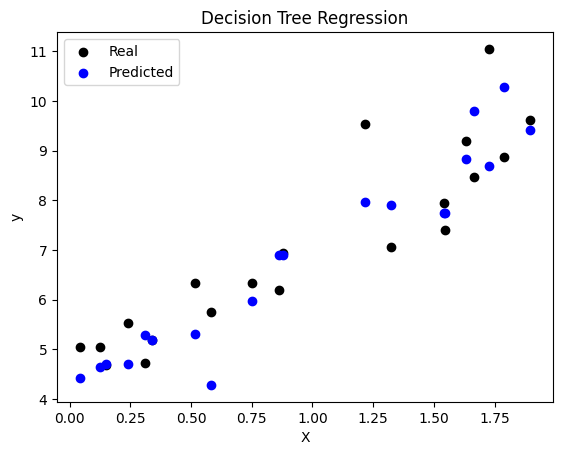

In [23]:
## implemente sua sua solução....

# Importando bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Criando dados de exemplo
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo de Árvore de Decisão
model_decision_tree = DecisionTreeRegressor()
model_decision_tree.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
predictions_decision_tree = model_decision_tree.predict(X_test)

# Avaliando o desempenho do modelo de Árvore de Decisão
mse_decision_tree = mean_squared_error(y_test, predictions_decision_tree)
print(f'Mean Squared Error (Decision Tree): {mse_decision_tree}')

# Plotando as previsões
plt.scatter(X_test, y_test, color='black')
plt.scatter(X_test, predictions_decision_tree, color='blue')
plt.title('Decision Tree Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(['Real', 'Predicted'])
plt.show()



## Regressão Polinomial

$$
Y = A + BX + C X² \\
$$
A, B e C são constantes que determinam a posição e inclinação da curva, o 2 indica o grau do polinômio. Para cada valor de X temos um Y associado.

    Em machine learning aprendemos que uma Regressão Polinomial é:

$$
Y_{predito} = \beta_o + \beta_1X + \beta_2X² \\
$$

$ \beta_o $ , $ \beta_1 $ e $ \beta_2 $ são parâmetros que determinam o peso da rede. Para cada entrada $ X $ temos um $ Y_{predito} $ aproximado predito.


Essa ideia se estende para polinômio de graus maiores:

$$
Y_{predito} = \beta_o + \beta_1X + \beta_2X² + ... + \beta_nX^n\\
$$



Soma dos Erros ao Quadrado (SSE): 602124 
Erro Quadrático Médio (MSE): 20070.81
Erro Médio Absoluto (MAE): 104.66
Raiz do Erro Quadrático Médio (RMSE): 141.67 
R2-score: 0.55


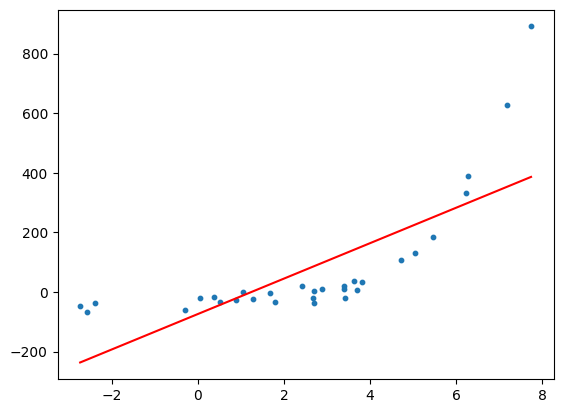

In [24]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# importa feature polinomial
from sklearn.preprocessing import PolynomialFeatures

#####----------- vou gerar alguns numeros aleatórios ------------------

#gerando numeros aleatorios, apenas para este exemplo
np.random.seed(42)
x = 2 - 3 * np.random.normal(0, 1, 30)
y = x - 3 * (x ** 2) + 0.8 * (x ** 3)+ 0.2 * (x ** 4) + np.random.normal(-20, 20, 30)

# ajuste nos dados, pois estamos trabalhando com a numpy
x = x[:, np.newaxis]
y = y[:, np.newaxis]
####---------------pronto já temos os dados para treinar -------------


#----É aqui que o seu código muda ------------------------------------

# Chama a função definindo o grau do polinomio e aplica o modelo

grau_poly = 1
polynomial_features= PolynomialFeatures(degree = grau_poly)
x_poly = polynomial_features.fit_transform(x)

#----Pronto agora é tudo como era antes, com regressão linear


model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

# Métrica de avaliação do modelo
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_poly_pred - y)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y,y_poly_pred))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y, y_poly_pred))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(y, y_poly_pred)))
print("R2-score: %.2f" % r2_score(y,y_poly_pred) )


plt.scatter(x, y, s=10)
# ordena os valores de x antes de plotar
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

plt.plot(x, y_poly_pred, color='r')
plt.show()

### Desafio 6

Faça uma função que calcula a regressão polinomial (basicamente colocar o codigo acima em uma função), agora faça um código que chama essa função alterando o grau do polinomio de 2 até 10, basicamente um loop for que chama a função criada.

Análise os resultados obtidos e determine qual o melhor grau polinomio do seu modelo.

Grau do Polinômio: 2
Soma dos Erros ao Quadrado (SSE): 140651.57
Erro Quadrático Médio (MSE): 4688.39
Erro Médio Absoluto (MAE): 57.64
Raiz do Erro Quadrático Médio (RMSE): 68.47
R2-score: 0.90


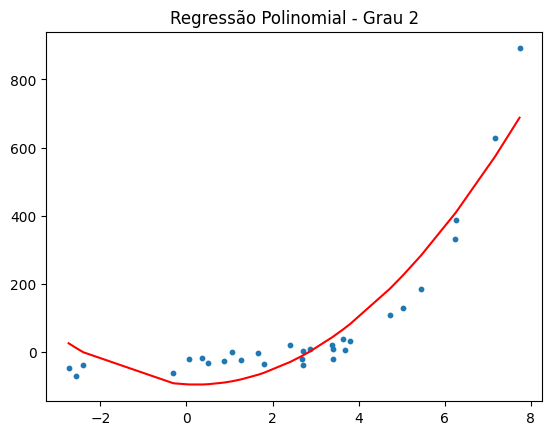

Grau do Polinômio: 3
Soma dos Erros ao Quadrado (SSE): 16518.90
Erro Quadrático Médio (MSE): 550.63
Erro Médio Absoluto (MAE): 18.81
Raiz do Erro Quadrático Médio (RMSE): 23.47
R2-score: 0.99


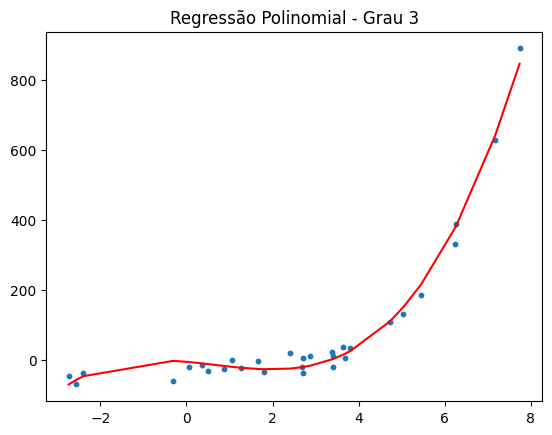

Grau do Polinômio: 4
Soma dos Erros ao Quadrado (SSE): 8123.18
Erro Quadrático Médio (MSE): 270.77
Erro Médio Absoluto (MAE): 13.76
Raiz do Erro Quadrático Médio (RMSE): 16.46
R2-score: 0.99


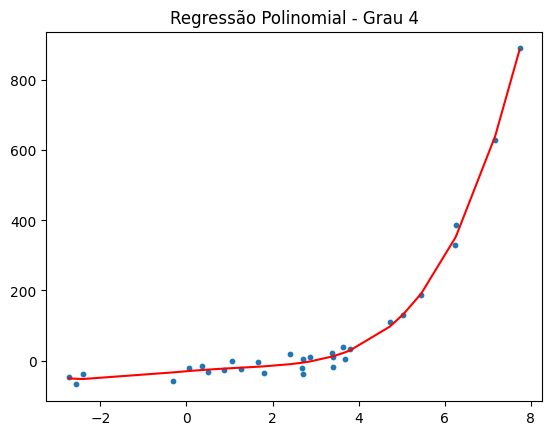

Grau do Polinômio: 5
Soma dos Erros ao Quadrado (SSE): 8058.80
Erro Quadrático Médio (MSE): 268.63
Erro Médio Absoluto (MAE): 13.91
Raiz do Erro Quadrático Médio (RMSE): 16.39
R2-score: 0.99


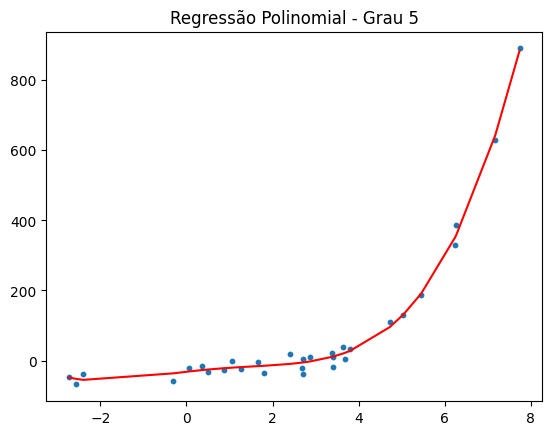

Grau do Polinômio: 6
Soma dos Erros ao Quadrado (SSE): 8017.69
Erro Quadrático Médio (MSE): 267.26
Erro Médio Absoluto (MAE): 13.86
Raiz do Erro Quadrático Médio (RMSE): 16.35
R2-score: 0.99


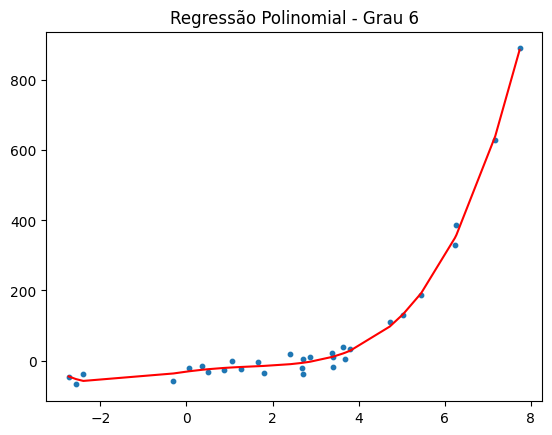

Grau do Polinômio: 7
Soma dos Erros ao Quadrado (SSE): 7648.55
Erro Quadrático Médio (MSE): 254.95
Erro Médio Absoluto (MAE): 13.84
Raiz do Erro Quadrático Médio (RMSE): 15.97
R2-score: 0.99


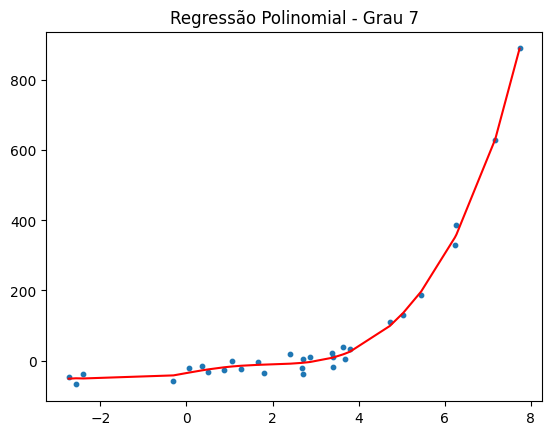

Grau do Polinômio: 8
Soma dos Erros ao Quadrado (SSE): 7625.89
Erro Quadrático Médio (MSE): 254.20
Erro Médio Absoluto (MAE): 13.91
Raiz do Erro Quadrático Médio (RMSE): 15.94
R2-score: 0.99


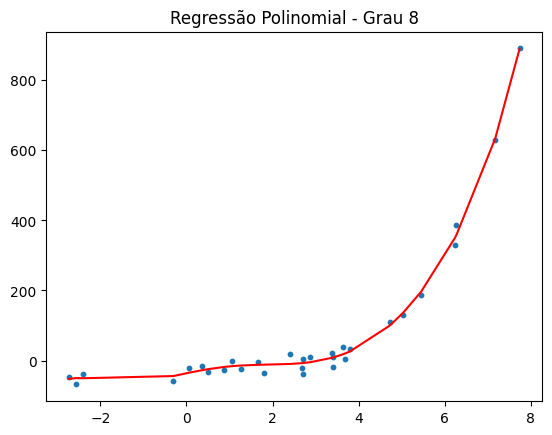

Grau do Polinômio: 9
Soma dos Erros ao Quadrado (SSE): 7534.07
Erro Quadrático Médio (MSE): 251.14
Erro Médio Absoluto (MAE): 13.63
Raiz do Erro Quadrático Médio (RMSE): 15.85
R2-score: 0.99


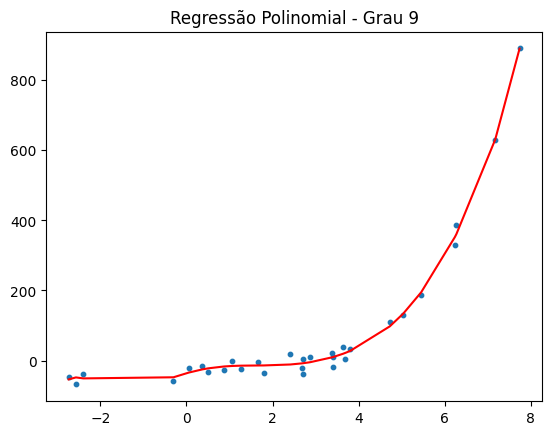

Grau do Polinômio: 10
Soma dos Erros ao Quadrado (SSE): 7361.35
Erro Quadrático Médio (MSE): 245.38
Erro Médio Absoluto (MAE): 13.11
Raiz do Erro Quadrático Médio (RMSE): 15.66
R2-score: 0.99


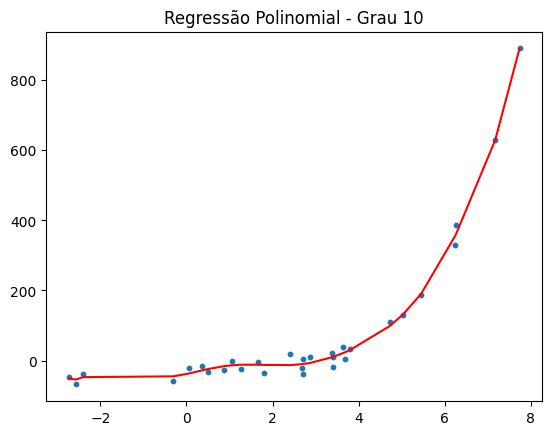

In [25]:
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

def regressao_polinomial(x, y, grau):
    # Aplica feature polinomial
    polynomial_features = PolynomialFeatures(degree=grau)
    x_poly = polynomial_features.fit_transform(x)

    # Aplica modelo de regressão linear
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    # Métricas de avaliação do modelo
    print(f"Grau do Polinômio: {grau}")
    print("Soma dos Erros ao Quadrado (SSE): %.2f" % np.sum((y_poly_pred - y)**2))
    print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y, y_poly_pred))
    print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y, y_poly_pred))
    print("Raiz do Erro Quadrático Médio (RMSE): %.2f" % np.sqrt(mean_squared_error(y, y_poly_pred)))
    print("R2-score: %.2f" % r2_score(y, y_poly_pred))

    # Plotando o modelo
    plt.scatter(x, y, s=10)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    plt.plot(x, y_poly_pred, color='r')
    plt.title(f'Regressão Polinomial - Grau {grau}')
    plt.show()

# Gerando números aleatórios
np.random.seed(42)
x = 2 - 3 * np.random.normal(0, 1, 30)
y = x - 3 * (x ** 2) + 0.8 * (x ** 3) + 0.2 * (x ** 4) + np.random.normal(-20, 20, 30)

# Ajuste nos dados
x = x[:, np.newaxis]
y = y[:, np.newaxis]

# Loop para diferentes graus de polinômios
for grau_poly in range(2, 11):
    regressao_polinomial(x, y, grau_poly)
